<a href="https://colab.research.google.com/github/MaidenTaief/Music_Final/blob/main/UserMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import os

print("Listing My Drive:")
drive_path = '/content/drive/My Drive'
print(os.listdir(drive_path))

try:
    shared_path = '/content/drive/Shared with me'
    print("\nListing Shared with me:")
    print(os.listdir(shared_path))
except Exception as e:
    print("\nError accessing 'Shared with me':", e)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Listing My Drive:
['DSC_0037.JPG', 'DSC_0031.JPG', 'DSC_0092.JPG', 'DSC_0042.JPG', 'DSC_0039.JPG', 'DSC_0013.JPG', 'DSC_0043.JPG', 'DSC_0038.JPG', 'DSC_0199.JPG', 'DSC_0041.JPG', 'DSC_0451.JPG', 'DSC_0469.JPG', 'DSC_0441.JPG', 'DSC_0445.JPG', 'DSC_0458.JPG', 'DSC_0464.JPG', 'DSC_0507.JPG', 'DSC_0447.JPG', 'DSC_0483.JPG', 'DSC_0517.JPG', 'DSC_0562.JPG', 'DSC_0548.JPG', 'DSC_0550.JPG', 'DSC_0552.JPG', 'DSC_0559.JPG', 'DSC_0551.JPG', 'DSC_0526.JPG', 'DSC_0569.JPG', 'DSC_0576.JPG', 'DSC_0484.JPG', 'DSC_0620.JPG', 'DSC_0571.JPG', 'DSC_0634.JPG', 'DSC_0580.JPG', 'DSC_0568.JPG', 'DSC_0625.JPG', 'DSC_0479.JPG', 'DSC_0574.JPG', 'DSC_0565.JPG', 'DSC_0635.JPG', 'DSC_0679.JPG', 'DSC_0669.JPG', 'DSC_0674.JPG', 'DSC_0556.JPG', 'DSC_0685.JPG', 'DSC_0682.JPG', 'DSC_0698.JPG', 'DSC_0659.JPG', 'DSC_0718.JPG', 'DSC_0728.JPG', 'DSC_0731.JPG', 'DSC_0733.JPG', 'DSC_0723.JPG', 'DSC

In [6]:
import pandas as pd

# Set the path to the dataset folder
dataset_path = '/content/drive/My Drive/DATASET'

# Reading the first CSV file and displaying the column names and first few rows
data_final_cleaned = pd.read_csv(f'{dataset_path}/data_final_cleaned.csv')
print("\nColumn Names of data_final_cleaned.csv:")
print(data_final_cleaned.columns)
print("\nHead of data_final_cleaned.csv:")
print(data_final_cleaned.head())

# Reading the second CSV file and displaying the column names and first few rows
spotify_dataset = pd.read_csv(f'{dataset_path}/spotify_dataset.csv', on_bad_lines='skip')
print("\nColumn Names of spotify_dataset.csv:")
print(spotify_dataset.columns)
print("\nHead of spotify_dataset.csv:")
print(spotify_dataset.head())



Column Names of data_final_cleaned.csv:
Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo', 'cluster'],
      dtype='object')

Head of data_final_cleaned.csv:
   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_

# Importing necessary libraries
import pandas as pd

### Dataset Paths
- **Purpose**: Define the path where the dataset is stored. This ensures easy modifications and reusability.
- **Note**: Make sure the path corresponds to the location where your datasets are actually stored in Google Drive.

# Set the path to the dataset folder
dataset_path = '/content/drive/My Drive/DATASET'

### Data Loading and Cleaning
#### Load `data_final_cleaned.csv`
- **Objective**: Load specific columns to save memory and normalize the 'name' column for consistent formatting.
- **Columns Loaded**: 'name', 'id', 'artists', 'cluster'

# Reading the datasets with only necessary columns to save memory
data_final_cleaned = pd.read_csv(f'{dataset_path}/data_final_cleaned.csv', usecols=['name', 'id', 'artists', 'cluster'])
data_final_cleaned['name_normalized'] = data_final_cleaned['name'].str.lower().str.strip()

#### Load `spotify_dataset.csv`
- **Objective**: Handle any bad lines during the load and standardize the column names by stripping and replacing unnecessary characters.
- **Handling Bad Lines**: Skip lines that do not conform to expected format.

spotify_dataset = pd.read_csv(f'{dataset_path}/spotify_dataset.csv', on_bad_lines='skip')
spotify_dataset.columns = spotify_dataset.columns.str.strip().str.replace('"', '')
spotify_dataset['trackname_normalized'] = spotify_dataset['trackname'].str.lower().str.strip()

### Data Merging
- **Purpose**: Merge the two datasets on normalized song names to combine relevant information.
- **Method**: Inner join ensures only matching records are included in the final dataset.

# Merge datasets on normalized song names
merged_data = pd.merge(spotify_dataset, data_final_cleaned, left_on='trackname_normalized', right_on='name_normalized', how='inner')
merged_data.drop(columns=['trackname_normalized', 'name_normalized'], inplace=True)

### Save and Review Merged Data
- **Objective**: Save the merged dataset and provide an overview of its size and first few rows.

# Save the merged dataset
merged_data.to_csv(f'{dataset_path}/merged_data.csv', index=False)

# Show number of rows and columns in the merged dataset
print(f"Number of rows in merged dataset: {merged_data.shape[0]}")
print(f"Number of columns in merged dataset: {merged_data.shape[1]}")

# Display the first 10 rows of the merged dataset
print(merged_data.head(10))



In [1]:
import pandas as pd

# Set the path to the dataset folder
dataset_path = '/content/drive/My Drive/DATASET'

# Reading the datasets with only necessary columns to save memory
data_final_cleaned = pd.read_csv(f'{dataset_path}/data_final_cleaned.csv', usecols=['name', 'id', 'artists', 'cluster'])
data_final_cleaned['name_normalized'] = data_final_cleaned['name'].str.lower().str.strip()

spotify_dataset = pd.read_csv(f'{dataset_path}/spotify_dataset.csv', on_bad_lines='skip')
spotify_dataset.columns = spotify_dataset.columns.str.strip().str.replace('"', '')
spotify_dataset['trackname_normalized'] = spotify_dataset['trackname'].str.lower().str.strip()

# Merge datasets on normalized song names
merged_data = pd.merge(spotify_dataset, data_final_cleaned, left_on='trackname_normalized', right_on='name_normalized', how='inner')
merged_data.drop(columns=['trackname_normalized', 'name_normalized'], inplace=True)

# Save the merged dataset
merged_data.to_csv(f'{dataset_path}/merged_data.csv', index=False)


# Show number of rows and columns in the merged dataset
print(f"Number of rows in merged dataset: {merged_data.shape[0]}")
print(f"Number of columns in merged dataset: {merged_data.shape[1]}")

print(merged_data.head(10))


Number of rows in merged dataset: 18210567
Number of columns in merged dataset: 8
                            user_id      artistname  \
0  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello   
2  ec6a9abc7a818b0c00788add9ec69c58  Elvis Costello   
3  ec6a9abc7a818b0c00788add9ec69c58  Elvis Costello   
4  7cae243a6e617bbac43848e587cf0177  Elvis Costello   
5  7cae243a6e617bbac43848e587cf0177  Elvis Costello   
6  6850dd8323fec9eecb29ce17bb967f2c  Elvis Costello   
7  6850dd8323fec9eecb29ce17bb967f2c  Elvis Costello   
8  0098b965803a4c10723f8e216f9e0904  Elvis Costello   
9  0098b965803a4c10723f8e216f9e0904  Elvis Costello   

                              trackname  \
0  (The Angels Wanna Wear My) Red Shoes   
1  (The Angels Wanna Wear My) Red Shoes   
2  (The Angels Wanna Wear My) Red Shoes   
3  (The Angels Wanna Wear My) Red Shoes   
4  (The Angels Wanna Wear My) Red Shoes   
5  (The Angels Wanna Wear My) Red Shoes   
6  (The Ang

# Importing necessary libraries
import pandas as pd

### Dataset Path
- **Purpose**: Establish the path where the dataset is stored, facilitating easy access and modifications.
- **Note**: Make sure the dataset path accurately points to where your datasets are stored on Google Drive.

# Set the path to the dataset folder
dataset_path = '/content/drive/My Drive/DATASET'

### Load the Merged Data
- **Objective**: Load the previously merged dataset for further processing.
- **File Loaded**: 'merged_data.csv'

# Load the merged data
merged_data = pd.read_csv(f'{dataset_path}/merged_data.csv')

### Data Cleaning
- **Purpose**: Remove exact duplicates to ensure the uniqueness of each record.
- **Method Used**: Pandas' `drop_duplicates` function, which inspects all columns for duplicates.

# Remove exact duplicates first
merged_data.drop_duplicates(inplace=True)

### Data Aggregation
- **Objective**: Aggregate the data to calculate the count of unique plays per song, per user, per playlist.
- **Details**: The aggregation is grouped by user ID, song name, playlist name, artist name, song ID, and cluster identifier.
- **Aggregation Result**: A new column 'play_count' indicates the number of times a song has been played within those groupings.

# Aggregate data to count unique plays per song per user per playlist
agg_data = merged_data.groupby(['user_id', 'name', 'playlistname', 'artistname', 'id', 'cluster']).size().reset_index(name='play_count')

### Save and Review Aggregated Data
- **Purpose**: Save the aggregated data for downstream analysis and provide an initial overview of its size and contents.
- **Output File**: 'aggregated_data.csv'

# Save the aggregated dataset
agg_data.to_csv(f'{dataset_path}/aggregated_data.csv', index=False)

# Show number of rows and columns in the aggregated dataset
print(f"Number of rows in aggregated dataset: {agg_data.shape[0]}")
print(f"Number of columns in aggregated dataset: {agg_data.shape[1]}")

# Display the first 20 rows of the aggregated dataset to inspect the results
print(agg_data.head(20))


In [4]:
import pandas as pd

# Set the path to the dataset folder
dataset_path = '/content/drive/My Drive/DATASET'

# Load the merged data
merged_data = pd.read_csv(f'{dataset_path}/merged_data.csv')

# Remove exact duplicates first
merged_data.drop_duplicates(inplace=True)

# Aggregate data to count unique plays per song per user per playlist
agg_data = merged_data.groupby(['user_id', 'name', 'playlistname', 'artistname', 'id', 'cluster']).size().reset_index(name='play_count')

# Save the aggregated dataset
agg_data.to_csv(f'{dataset_path}/aggregated_data.csv', index=False)

# Show number of rows and columns in the aggregated dataset
print(f"Number of rows in aggregated dataset: {agg_data.shape[0]}")
print(f"Number of columns in aggregated dataset: {agg_data.shape[1]}")

# show a few rows to inspect the dataset
print(agg_data.head(20))


Number of rows in aggregated dataset: 18172814
Number of columns in aggregated dataset: 7
                             user_id                 name playlistname  \
0   00055176fea33f6e027cd3302289378b                   18         favs   
1   00055176fea33f6e027cd3302289378b                   18         favs   
2   00055176fea33f6e027cd3302289378b                   18         favs   
3   00055176fea33f6e027cd3302289378b                   18         favs   
4   00055176fea33f6e027cd3302289378b              21 Guns         favs   
5   00055176fea33f6e027cd3302289378b    A Little Too Much         favs   
6   00055176fea33f6e027cd3302289378b           Act My Age         favs   
7   00055176fea33f6e027cd3302289378b       After Midnight         favs   
8   00055176fea33f6e027cd3302289378b       After Midnight         favs   
9   00055176fea33f6e027cd3302289378b       After Midnight         favs   
10  00055176fea33f6e027cd3302289378b       After Midnight         favs   
11  00055176fea33f6e02

In [6]:
import pandas as pd
from scipy.sparse import csr_matrix, save_npz

# Load the aggregated data
agg_data = pd.read_csv(f'{dataset_path}/aggregated_data.csv')

# Convert user IDs and track names to categorical data types for efficient encoding
agg_data['user_id'] = pd.Categorical(agg_data['user_id'])
agg_data['name'] = pd.Categorical(agg_data['name'])

# Create row and column indices using the categorical codes
row_indices = agg_data['user_id'].cat.codes
col_indices = agg_data['name'].cat.codes

# Use play_count as the data for the sparse matrix
data = agg_data['play_count'].values

# Create a sparse matrix with rows as users and columns as tracks
# shape parameters are derived from the number of categories in each feature
interaction_matrix = csr_matrix((data, (row_indices, col_indices)),
                                shape=(agg_data['user_id'].cat.categories.size,
                                       agg_data['name'].cat.categories.size))

# Save the sparse matrix for future use
save_npz(f'{dataset_path}/sparse_song_matrix.npz', interaction_matrix)

# Display the shape of the interaction matrix and other details
print("Shape of the sparse song interaction matrix:", interaction_matrix.shape)
print("Non-zero elements in song matrix:", interaction_matrix.nnz)


Shape of the sparse song interaction matrix: (15598, 75700)
Non-zero elements in song matrix: 4745271


### Data Conversion for Matrix Operations
- **Purpose**: Convert user IDs and track names to categorical data types. This allows for efficient encoding and manipulation.
- **Method**: Use Pandas' Categorical type to transform and then access category codes.

# Convert user IDs and track names to categorical data types for efficient encoding
agg_data['user_id'] = pd.Categorical(agg_data['user_id'])
agg_data['name'] = pd.Categorical(agg_data['name'])

### Matrix Index Preparation
- **Objective**: Create row and column indices for the sparse matrix using the categorical codes from the transformed data.

# Create row and column indices using the categorical codes
row_indices = agg_data['user_id'].cat.codes
col_indices = agg_data['name'].cat.codes

### Sparse Matrix Creation
- **Purpose**: Create a sparse matrix where rows represent users and columns represent songs. The matrix values are the play counts.
- **Details**: Using the SciPy library to create a Compressed Sparse Row (CSR) matrix, which is efficient for row slicing and fast matrix-vector products.

# Use play_count as the data for the sparse matrix
data = agg_data['play_count'].values

# Create a sparse matrix with rows as users and columns as tracks
# shape parameters are derived from the number of categories in each feature
interaction_matrix = csr_matrix((data, (row_indices, col_indices)),
                                shape=(agg_data['user_id'].cat.categories.size,
                                       agg_data['name'].cat.categories.size))

### Save and Review the Sparse Matrix
- **Objective**: Save the generated sparse matrix to a file for future use and analyze its characteristics.
- **Output File**: 'sparse_song_matrix.npz'

# Save the sparse matrix for future use
save_npz(f'{dataset_path}/sparse_song_matrix.npz', interaction_matrix)

# Display the shape of the interaction matrix and other details
print("Shape of the sparse song interaction matrix:", interaction_matrix.shape)
print("Non-zero elements in song matrix:", interaction_matrix.nnz)


In [19]:
import pandas as pd
from scipy.sparse import csr_matrix, save_npz

# Load the aggregated data
agg_data = pd.read_csv(f'{dataset_path}/aggregated_data.csv')

# Convert user IDs and playlist names to categorical data types for efficient encoding
agg_data['user_id'] = pd.Categorical(agg_data['user_id'])
agg_data['playlistname'] = pd.Categorical(agg_data['playlistname'])

# Create row and column indices using the categorical codes
row_indices = agg_data['user_id'].cat.codes
col_indices = agg_data['playlistname'].cat.codes

# Use play_count as the data for the sparse matrix
data = agg_data['play_count'].values

# Create a sparse matrix with rows as users and columns as playlists
# shape parameters are derived from the number of categories in each feature
playlist_interaction_matrix = csr_matrix((data, (row_indices, col_indices)),
                                shape=(agg_data['user_id'].cat.categories.size,
                                       agg_data['playlistname'].cat.categories.size))

# Save the sparse matrix for future use
save_npz(f'{dataset_path}/playlist_interaction_sparse_matrix.npz', playlist_interaction_matrix)

# Display the shape of the interaction matrix and other details
print("Shape of the playlist interaction matrix:", playlist_interaction_matrix.shape)
print("Non-zero elements in playlist matrix:", playlist_interaction_matrix.nnz)

Shape of the playlist interaction matrix: (15598, 136182)
Non-zero elements in playlist matrix: 204251


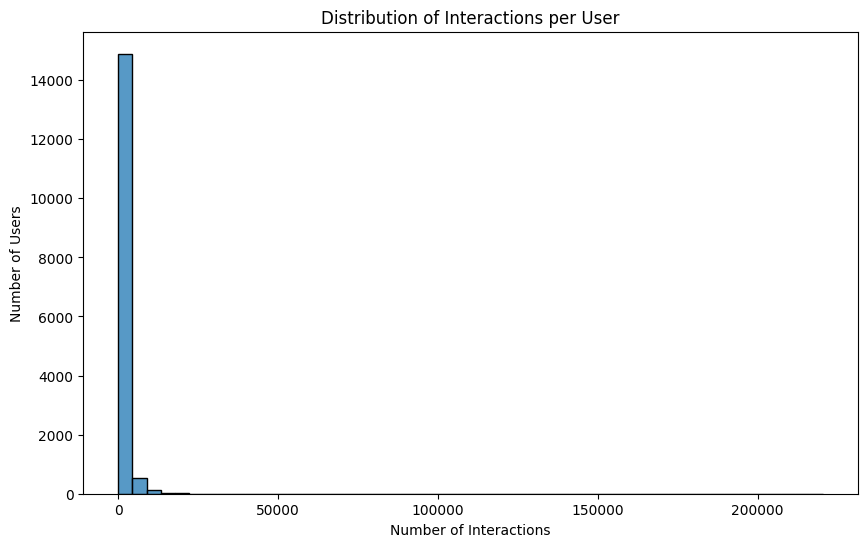

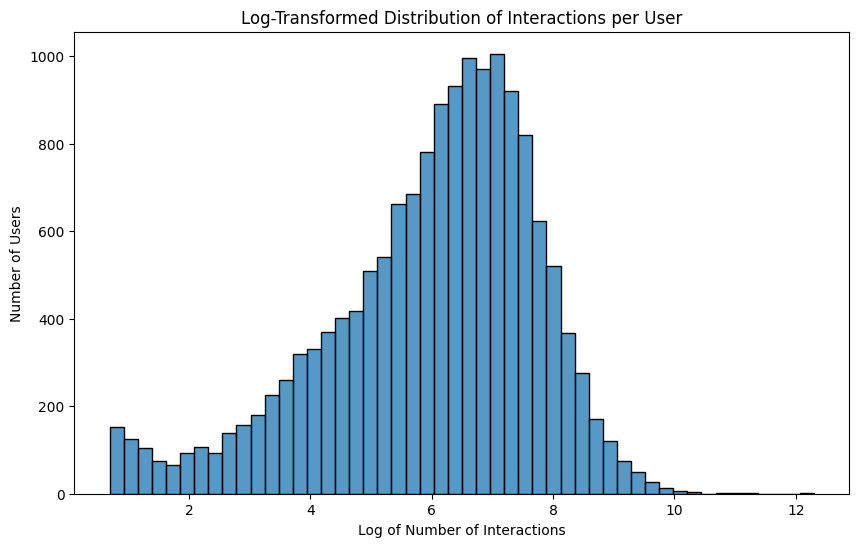

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sum interactions across songs for each user
user_interactions = interaction_matrix.sum(axis=1).A.ravel()  # .A converts to dense array, .ravel to flatten it

# Plot the distribution of interactions
plt.figure(figsize=(10, 6))
sns.histplot(user_interactions, bins=50, kde=False)
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(user_interactions), bins=50, kde=False)  # Use log1p for log(1+x) transformation
plt.title('Log-Transformed Distribution of Interactions per User')
plt.xlabel('Log of Number of Interactions')
plt.ylabel('Number of Users')
plt.show()


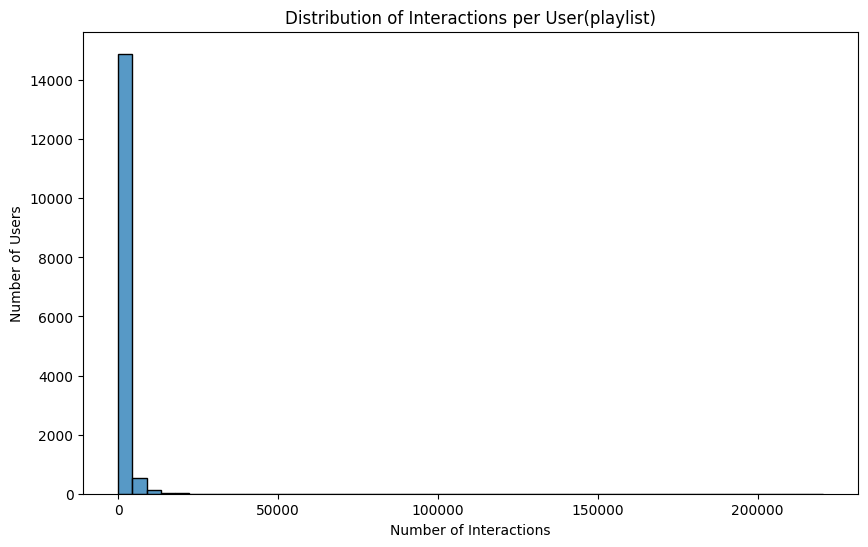

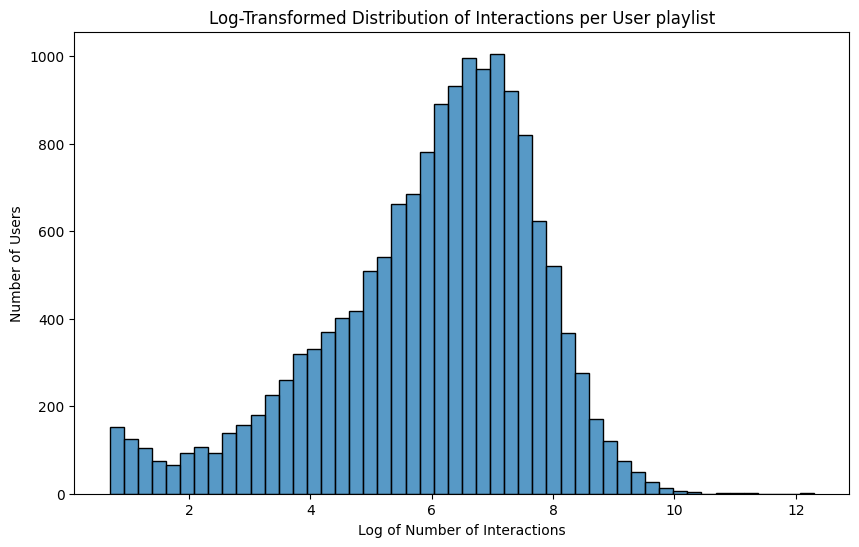

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sum interactions across songs for each user
user_playlist_interactions = playlist_interaction_matrix.sum(axis=1).A.ravel()  # .A converts to dense array, .ravel to flatten it

# Plot the distribution of interactions
plt.figure(figsize=(10, 6))
sns.histplot(user_playlist_interactions, bins=50, kde=False)
plt.title('Distribution of Interactions per User(playlist)')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(user_playlist_interactions), bins=50, kde=False)  # Use log1p for log(1+x) transformation
plt.title('Log-Transformed Distribution of Interactions per User playlist')
plt.xlabel('Log of Number of Interactions')
plt.ylabel('Number of Users')
plt.show()


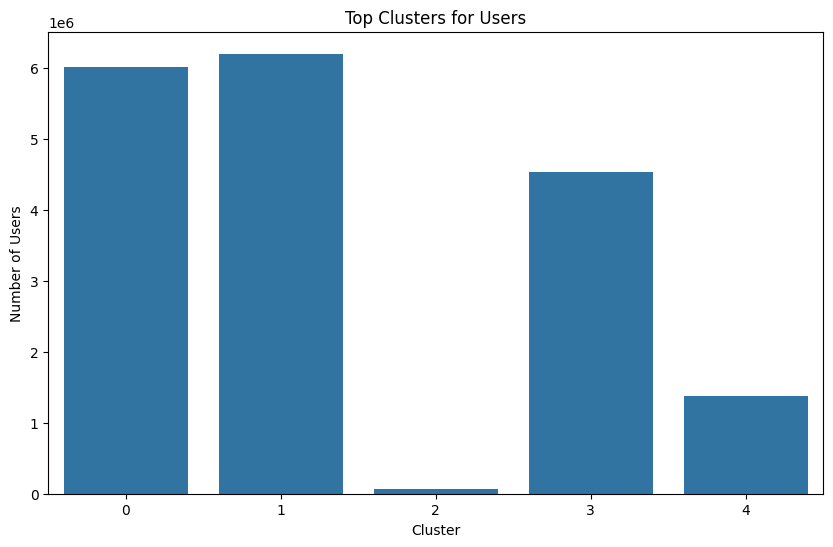

In [23]:
cluster_counts = agg_data['cluster'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Top Clusters for Users')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()

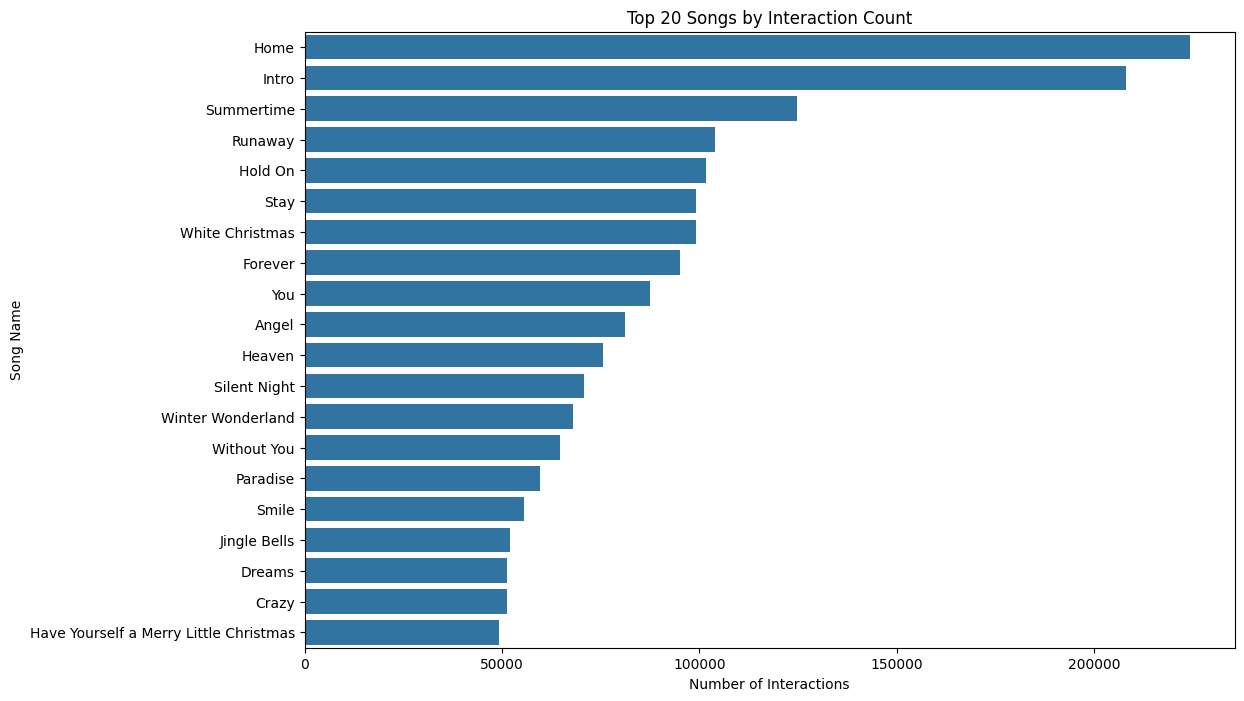

In [24]:
song_counts = agg_data.groupby('name')['play_count'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=song_counts.values, y=song_counts.index)
plt.title('Top 20 Songs by Interaction Count')
plt.xlabel('Number of Interactions')
plt.ylabel('Song Name')
plt.show()

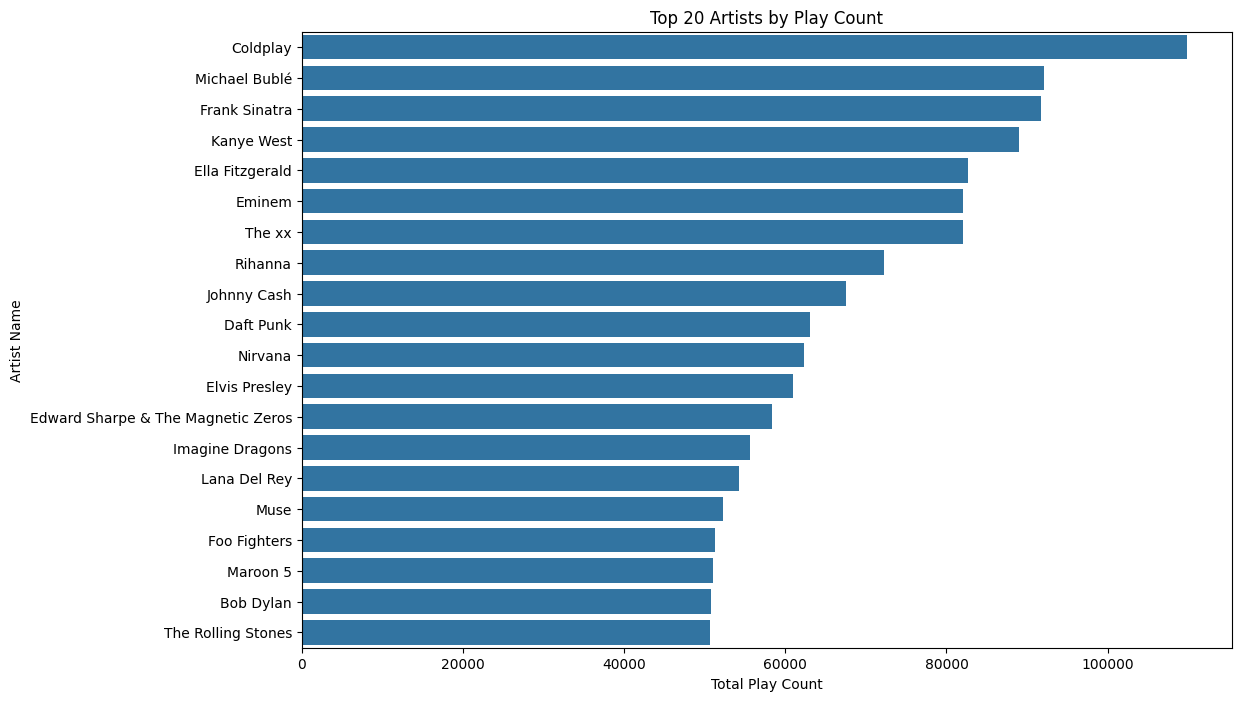

In [28]:
top_artists = agg_data.groupby('artistname')['play_count'].sum().nlargest(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 20 Artists by Play Count')
plt.xlabel('Total Play Count')
plt.ylabel('Artist Name')
plt.show()


### Recommendation Function: get_recommendations

```python
def get_recommendations(input_name, data, item_type='song', top_n=10):
    """
    Generates recommendations based on clustering similarity within a dataset.
    
    Parameters:
    - input_name: str, the name of the song or artist to find recommendations for.
    - data: DataFrame, the dataset containing songs, artists, and their cluster information.
    - item_type: str, specifies whether the recommendations are for 'song' or 'artist'.
    - top_n: int, limits the number of recommendations to return.

    Returns:
    - DataFrame with columns ['name', 'artistname', 'playlistname'] of recommended songs or artists.
    """
  
  ### Logical Explanation and Reasoning Behind the Function:
- Function Purpose: The get_recommendations function is designed to provide user-specific recommendations based on similarity clustering. This approach assumes that items within the same cluster have similar attributes or appeal to similar tastes.

- Cluster Identification: The function first identifies which cluster the given song or artist belongs to. This step is crucial as it determines the pool from which recommendations will be drawn.

- Retrieving Similar Items: It then fetches all other items from the same cluster. This step ensures that the recommendations are contextually similar to the input.

- Filtering: For song recommendations, the function excludes the song used as input to ensure the recommendations are new to the user.

- Sampling: If the number of similar items is greater than the desired number of recommendations (top_n), the function randomly samples from these items to limit the output. This randomness introduces variety in the recommendations.

- Output: Finally, the function returns a DataFrame containing the names, artist names, and playlist names of the recommended songs or artists. This formatted output is ready for user consumption or further analysis.

In [33]:
def get_recommendations(input_name, data, item_type='song', top_n=10):
    # Find the cluster to which the input song/artist belongs
    if item_type == 'song':
        input_cluster = data.loc[data['name'] == input_name, 'cluster'].iloc[0]
    else:
        input_cluster = data.loc[data['artistname'] == input_name, 'cluster'].iloc[0]

    # Get all items in the same cluster
    similar_items = data[data['cluster'] == input_cluster]

    # If recommending songs, filter out the input song
    if item_type == 'song':
        similar_items = similar_items[similar_items['name'] != input_name]

    # If there are too many items, sample a subset
    if len(similar_items) > top_n:
        similar_items = similar_items.sample(n=top_n)

    # Assuming that each song has a unique name or you want to return all songs with that name
    return similar_items[['name', 'artistname', 'playlistname']]

input_song_name = 'Heaven'  # replace with your song name
song_recommendations = get_recommendations(input_song_name, agg_data, item_type='song')
print(song_recommendations)


                        name                      artistname  \
6916757     Jingle Bell Rock                     Bobby Helms   
3969751             La flaca                  Jarabe De Palo   
13747003  Who Can It Be Now?                     Men At Work   
8748808       Sexual Healing                     Marvin Gaye   
8017042            The Flame                        Chimaira   
4168283               Always                    Urban Rescue   
15458322       Summer Nights                       Van Halen   
8438277            Come Thru                           Drake   
10031363                Stay  Maurice Williams & The Zodiacs   
11791282                Stay                         Rihanna   

                                               playlistname  
6916757                                               X-mas  
3969751                                          en español  
13747003                                    Totes 80s Faves  
8748808                                        

In [43]:
from scipy.sparse import load_npz

# Load the sparse matrix and convert to float
dataset_path = '/content/drive/My Drive/DATASET'
interaction_matrix = load_npz(f'{dataset_path}/sparse_song_matrix.npz').astype(float)

# Verify data type
print("Data type of the matrix:", interaction_matrix.dtype)

# Print the column names of your DataFrame to verify
print(agg_data.columns)
print("Interaction matrix dimensions:", interaction_matrix.shape)
print("Number of unique user IDs:", len(unique_user_ids))
print("Number of unique song IDs:", len(unique_song_ids))


Data type of the matrix: float64
Index(['user_id', 'name', 'playlistname', 'artistname', 'id', 'cluster',
       'play_count'],
      dtype='object')
Interaction matrix dimensions: (15598, 75700)
Number of unique user IDs: 15598
Number of unique song IDs: 108504


In [38]:
from scipy.sparse.linalg import svds

# Perform SVD
u, s, vt = svds(interaction_matrix, k=50)  # k is the number of latent features
s_diag_matrix = np.diag(s)
predicted_ratings = np.dot(np.dot(u, s_diag_matrix), vt)  # Reconstruct the ratings matrix

In [45]:
import pandas as pd
import numpy as np
from scipy.sparse import load_npz
from scipy.sparse.linalg import svds

# Load and prepare your dataset
dataset_path = '/content/drive/My Drive/DATASET'
agg_data = pd.read_csv(f'{dataset_path}/aggregated_data.csv')

from scipy.sparse.linalg import svds

# Load the matrix
interaction_matrix = load_npz(f'{dataset_path}/sparse_song_matrix.npz')

# Perform SVD
u, s, vt = svds(interaction_matrix, k=50)  # k is the number of latent factors
s_diag_matrix = np.diag(s)
predicted_ratings = np.dot(np.dot(u, s_diag_matrix), vt)  # Reconstruct the ratings matrix

# Convert to a DataFrame for easier manipulation
predicted_ratings_df = pd.DataFrame(
    predicted_ratings,
    index = pd.unique(agg_data['user_id'].cat.codes),
    columns = pd.unique(agg_data['name'].cat.codes)
)

def recommend_songs(user_index, matrix, top_n=10):
    user_ratings = matrix[user_index]
    top_ratings_indices = np.argsort(-user_ratings)[:top_n]
    recommended_song_indices = pd.Series(top_ratings_indices).map(agg_data['name'].cat.categories)
    return recommended_song_indices

# Example: Get recommendations for a user
user_index = '00055176fea33f6e027cd3302289378b'  # Example user index
recommended_songs = recommend_songs(user_index, predicted_ratings, top_n=10)
print(recommended_songs)


ValueError: `A` must be of floating or complex floating data type.

In [ ]:

# Define the hybrid recommendation function
def hybrid_recommendation(user_id, input_name, data, predicted_ratings_df, top_n=10):
    input_cluster = data.loc[data['name'] == input_name, 'cluster'].iloc[0]
    cluster_items = data[(data['cluster'] == input_cluster) & (data['name'] != input_name)]

    # Handling potential KeyError if 'id' not found in the DataFrame index
    user_predictions = predicted_ratings_df.loc[user_id, cluster_items['id']].dropna().sort_values(ascending=False)
    top_items = user_predictions.head(top_n).index
    recommended_items = cluster_items[cluster_items['id'].isin(top_items)]

    return recommended_items[['name', 'artistname', 'playlistname']]

# Example usage
user_id = '00055176fea33f6e027cd3302289378b'  # Replace with a valid user ID
input_song_name = 'Heaven'  # Replace with a valid song name from your dataset

recommendations = hybrid_recommendation(user_id, input_song_name, agg_data, predicted_ratings_df)
print(recommendations)
